In [3]:
import json

file_path1 = "/home/nickatomlin/vivek/agi-bench/results/eval_20241004_031100.json"
file_path2 = "/home/nickatomlin/vivek/agi-bench/results/eval_20241004_050419.json"
file_path3 = "/home/nickatomlin/vivek/agi-bench/results/eval_20241004_173446.json"

In [4]:
def compute_statistics(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    
    gpt_wins, other = 0, 0
    counter = 0
    for i in data:
        if i.isnumeric():
            successful = data[i]["gpt_wins"] + data[i]["agent_wins"] + data[i]["draws"]
            if successful > 0.75 * data[i]["total_games"]:
                gpt_wins += data[i]["gpt_wins"]
                other += data[i]["agent_wins"] + data[i]["draws"]
                counter += 1

    gpt_win_rate = gpt_wins / (gpt_wins + other) if (gpt_wins + other) > 0 else 0

    print(f"GPT Wins: {gpt_wins}")
    print(f"Other Wins: {other}")
    print(f"Total Games: {counter}")
    print(f"GPT Win Rate: {gpt_win_rate:.2%}")

In [5]:
compute_statistics(file_path1)

GPT Wins: 60
Other Wins: 350
Total Games: 41
GPT Win Rate: 14.63%


In [6]:
compute_statistics(file_path2)

GPT Wins: 53
Other Wins: 384
Total Games: 44
GPT Win Rate: 12.13%


In [7]:
compute_statistics(file_path3)

GPT Wins: 72
Other Wins: 336
Total Games: 41
GPT Win Rate: 17.65%


In [1]:
from gg_bench.utils.chat_completion import chat_completion
import json
import random

with open("gg_bench/data/splits/valid_envs.json") as f:
    data = json.load(f)

valid_envs = [int(i[0]) for i in data]

prompt = "{description}\nWrite a short 2-3 sentence description of what this game is. Give it in the format:\n\n{{Game Name}}: {{Summary}}"
summaries = []

for i in random.sample(valid_envs, 10):
    with open(f"gg_bench/data/descriptions/{i}.txt") as f:
        description = f.read()
    
    current_prompt = prompt.format(description=description) 
    summaries.append(chat_completion("o4-mini", [{"role": "user", "content": current_prompt}]))
    

In [2]:
for n, i in enumerate(summaries):
    print(f"Description {n+1}: {i}") 

Description 1: Reach 27: A two-player turn-based game where players alternately add a number from 1 to 9 to a running total, striving to be the one who hits exactly 27. Exceeding 27 on your turn results in an immediate loss, so careful calculation and strategic planning are essential. The first player to reach exactly 27 wins the game.
Description 2: Target Sum: A two-player turn-based game where players alternately pick unique numbers from 1 to 10, adding them to their personal total in an attempt to hit exactly 25 without going over. If you exceed 25 you lose immediately, and if all numbers are exhausted with no exact 25, the higher total wins, making both careful calculation and tactical blocking essential.
Description 3: Prime War: A two-player turn-based strategy game where players alternately choose unique prime numbers from a shared pool, adding to their cumulative score. The first to reach exactly 50 points wins instantly, while exceeding 50 results in an immediate loss. Skillf

Description 1: Bluff Battle is a strategic two-player card game where each player competes to score the highest points across 15 rounds using a unique set of numbered cards from 1 to 5. Players must carefully select and play their cards while anticipating their opponent's moves, as points are awarded based on the difference in card values. Victory is achieved through skillful card management and psychological tactics, making it a dynamic and engaging gameplay experience.

Description 2: **Word Ladder Duel** is a strategic word game where two players take turns transforming a 5-letter word by changing exactly one letter to create a new valid word. The objective is to outlast the opponent by ensuring they cannot find a valid word on their turn, thus making strategic word choices and anticipating potential responses crucial for victory. Gaining lexical knowledge and planning ahead can significantly enhance a player's chances of winning.

Description 3: **Subtract Square** is a strategic two-player game where players take turns subtracting perfect square numbers from a starting total to reduce it to exactly zero. The player who makes the last valid move wins the game, requiring careful planning and anticipation of the opponent's moves to secure victory.

Description 4: Star Collector is a strategic two-player game where the objective is to collect the last star from a central pool of 21 stars. Players take turns collecting between 1 to 4 stars, with the challenge of forcing their opponent into a position that guarantees their own victory. Success relies on foresight and tactical play to control the number of stars remaining and ultimately claim the final star.

Description 5: **Token Nimble** is a strategic two-player game where players take turns removing tokens from three distinct rows, with the objective of being the last to remove a token from the board. Players must carefully choose how many tokens to remove from a single row during their turn, with the ultimate goal of leaving their opponent with no moves left. The simplicity of the rules combined with strategic depth creates an engaging challenge for players of all skill levels.

Description 6: Duel Masters is a strategic card game where players compete to reduce their opponent's Life Points from 5 to 0 using a combination of Attack, Block, and Counter cards. Each player has a limited hand and must carefully manage their cards, predicting their opponent's moves to effectively defend against attacks or launch their own. The game emphasizes tactical decision-making and strategic resource management for a thrilling duel experience.

Description 7: Alphabet War is a competitive word game where two players take turns forming valid English words to claim unclaimed letters from the alphabet. The objective is to strategically use words to accumulate 14 or more letters, thereby gaining majority control of the alphabet and winning the game. Players must carefully navigate letter claims and word validity while blocking their opponent’s progress.

Description 8: "Reach Twenty" is a two-player number game where the objective is to be the first to reach exactly 20 by adding integers from 1 to 3 to a running total that starts at 0. Players take turns selecting numbers while adhering to rules preventing them from exceeding the target total, resulting in strategic gameplay that emphasizes foresight and optimal moves. With simple mechanics and quick rounds, it offers a fun and engaging challenge for casual and competitive players alike.

Description 9: Zero Sum is a two-player strategic game where players take turns subtracting between 1 to 4 from a shared number, starting at 21, with the goal of reaching exactly zero first. Players must outmaneuver each other by controlling key totals and anticipating their opponent's moves, making it a quick yet engaging challenge that tests arithmetic skills and strategic thinking. With straightforward rules and fast-paced gameplay, it delivers competitive fun in a simple command-line format.

Description 10: **Stone Piles** is a strategic two-player turn-based game where players take turns removing stones from one of three piles, with the objective of avoiding leaving their opponent in a position to win. The game combines elements of foresight and strategy, as players must outmaneuver each other to be the one to remove the last stone. With simple rules and engaging gameplay, it offers a competitive challenge for players of all skill levels.

In [10]:
import openai
from utils.load_yaml import load_yaml

openai.api_key = load_yaml("openai_config.yaml")["api_key"]

ModuleNotFoundError: No module named 'utils.load_yaml'

In [ ]:
response = openai.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": "What is the capital of the United States?"},
    ],
)

In [12]:
print(response.usage)

CompletionUsage(completion_tokens=12, prompt_tokens=16, total_tokens=28, prompt_tokens_details={'cached_tokens': 0}, completion_tokens_details={'reasoning_tokens': 0})


In [ ]:

# file_path = "/home/nickatomlin/vivek/agi-bench/results/eval_20241117_203351.json"
# file_path = "results/claude-3.5-sonnet_eval_20250114_084220.json"
# file_path = "results/gpt-4o_eval_20241130_230118.json"
# file_path = "results/gpt-4o-mini_eval_20241117_203351.json"
# file_path = "results/llama-3.3-70b_eval_together.json"
import json

file_path = "results/gpt-4o-mini_eval_20250304_062621.json"
file_path = "results/gpt-4o-mini_eval_20250304_204004.json"
file_path = "results/gpt-4o_eval_20250305_232011.json"

# valid_envs = []

# for file in ["easy", "medium", "hard"]:
#     with open(f"gg_bench/data/splits/{file}.json") as f:
#         valid_envs += json.load(f)

# print(len(valid_envs))

In [5]:
def compute_statistics(
    file_path: str,
    successful_threshold: float = 0.75,
    min_avg_turns: int = 4,
    max_avg_turns: int = float("inf"),
):
    with open(file_path, "r") as f:
        data = json.load(f)

    gpt_wins = agent_wins = draws = 0
    gpt_faults = agent_faults = env_faults = 0
    counter = 0

    for game_idx in data:
        game_idx = str(game_idx)
        if game_idx not in data:
            continue
        stats = data[game_idx]
        if not game_idx.isnumeric():
            continue

        if (
            stats["avg_turns_per_game"] < min_avg_turns
            or stats["avg_turns_per_game"] > max_avg_turns
        ):
            # gpt_faults += stats["gpt_faults"]
            # agent_faults += stats["agent_faults"]
            # env_faults += stats["env_faults"]
            continue

        successful = stats["gpt_wins"] + stats["agent_wins"] + stats["draws"]
        if successful < successful_threshold * stats["total_games"]:
            # gpt_faults += stats["gpt_faults"]
            # agent_faults += stats["agent_faults"]
            # env_faults += stats["env_faults"]
            continue

        gpt_wins += stats["gpt_wins"]
        agent_wins += stats["agent_wins"]
        draws += stats["draws"]
        counter += 1
        
        gpt_faults += stats["gpt_faults"]
        agent_faults += stats["agent_faults"]
        env_faults += stats["env_faults"]
 

    gpt_win_rate = (gpt_wins) / (gpt_wins + agent_wins + draws) if (gpt_wins + agent_wins + draws) > 0 else 0

    print(f"GPT Wins: {gpt_wins}")
    print(f"Agent Wins: {agent_wins}")
    print(f"Draws: {draws}")
    print(f"Total Trajectories: {gpt_wins + agent_wins + draws}")
    print(f"Total Games: {counter}")
    print(f"GPT Win Rate: {gpt_win_rate:.2%}")
    print(f"GPT Faults: {gpt_faults}")
    print(f"Agent Faults: {agent_faults}")
    print(f"Env Faults: {env_faults}")

In [6]:
print(
    compute_statistics(
        file_path, successful_threshold=0, min_avg_turns=0, max_avg_turns=float("inf")
    )
)

GPT Wins: 307
Agent Wins: 2733
Draws: 314
Total Trajectories: 3354
Total Games: 117
GPT Win Rate: 9.15%
GPT Faults: 156
Agent Faults: 0
Env Faults: 0
None


In [ ]:

valid_envs = []

for file in ["easy", "medium", "hard"]:
    with open(f"gg_bench/data/splits/{file}.json") as f:
        valid_envs += json.load(f)

In [ ]:
with open("gg_bench/data/splits/valid_envs.json", "w") as f:
    json.dump(valid_envs, f)

In [ ]:
cmd = "dolos run -f web"
for env in valid_envs:
    cmd += f" gg_bench/data/envs/env_{env}.py"

with open("plag.sh", "w") as f:
    f.write(cmd)

In [4]:
csv_path = "results/dolos_report/pairs.csv"

# Load the csv file
import pandas as pd

df = pd.read_csv(csv_path)

import matplotlib.pyplot as plt

# Plot the histogram and print statistics of df["similarity"]

print(df["similarity"].describe())

plt.hist(df["similarity"], bins=20)
plt.xlabel("Similarity")
plt.ylabel("Frequency")
plt.title("Similarity Distribution")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'results/dolos_report/pairs.csv'

In [ ]:
with open("gg_bench/data/valid_envs.json") as f:
    valid_envs_to_be_filtered = json.load(f)

In [8]:
len(valid_envs_to_be_filtered["valid_envs"])

651

In [9]:
len(set(valid_envs_to_be_filtered["valid_envs"]) & set(valid_envs))

316

In [7]:
for i in sorted(valid_envs):
    print(i)

2
3
6
7
8
14
16
18
25
27
28
30
32
33
34
35
37
40
43
44
48
49
60
64
66
67
68
71
73
74
79
80
81
82
84
87
94
95
100
101
102
105
108
111
114
116
117
118
123
124
127
128
129
132
135
136
137
139
141
142
143
146
149
150
151
152
153
154
155
160
162
165
167
178
180
181
192
201
205
207
208
209
210
212
213
217
218
219
221
224
226
228
234
235
237
239
241
243
250
251
257
259
260
261
262
263
264
266
267
268
272
274
277
279
281
285
288
291
293
299
303
305
307
308
310
312
313
314
317
320
324
325
327
328
330
331
333
335
343
345
346
353
354
355
356
364
365
366
369
370
371
372
373
377
380
383
385
386
387
388
389
390
392
397
402
408
409
411
415
417
418
419
422
423
424
425
426
433
434
438
441
442
445
446
447
448
451
453
455
457
461
464
474
477
479
480
482
483
486
489
491
494
496
502
503
504
508
510
512
513
517
520
523
524
526
531
533
539
545
547
548
550
551
554
555
556
557
559
564
565
567
573
576
577
579
581
582
583
584
590
593
594
597
598
599
600
603
605
606
609
610
611
612
614
615
616
618
619
624
626
631

In [1]:
import json

file_path = "results/gpt-4o-mini_eval_20241117_203351.json"

def compute_statistics(
    file_path: str,
    successful_threshold: float = 0.75,
    min_avg_turns: int = 4,
    max_avg_turns: int = float("inf"),
):
    with open(file_path, "r") as f:
        data = json.load(f)

    gpt_wins = agent_wins = draws = 0
    gpt_faults = agent_faults = env_faults = 0
    counter = 0

    for game_idx in valid_envs:
        game_idx = str(game_idx)
        if game_idx not in data:
            continue
        stats = data[game_idx]
        if not game_idx.isnumeric():
            continue

        # if (
        #     stats["avg_turns_per_game"] < min_avg_turns
        #     or stats["avg_turns_per_game"] > max_avg_turns
        # ):
        #     # gpt_faults += stats["gpt_faults"]
        #     # agent_faults += stats["agent_faults"]
        #     # env_faults += stats["env_faults"]
        #     continue

        # successful = stats["gpt_wins"] + stats["agent_wins"] + stats["draws"]
        # if successful < successful_threshold * stats["total_games"]:
        #     # gpt_faults += stats["gpt_faults"]
        #     # agent_faults += stats["agent_faults"]
        #     # env_faults += stats["env_faults"]
        #     continue

        gpt_wins += stats["gpt_wins"]
        agent_wins += stats["agent_wins"]
        draws += stats["draws"]
        counter += 1
        
        gpt_faults += stats["gpt_faults"]
        agent_faults += stats["agent_faults"]
        env_faults += stats["env_faults"]
 

    gpt_win_rate = (gpt_wins) / (gpt_wins + agent_wins + draws) if (gpt_wins + agent_wins + draws) > 0 else 0

    print(f"GPT Wins: {gpt_wins}")
    print(f"Agent Wins: {agent_wins}")
    print(f"Draws: {draws}")
    print(f"Total Trajectories: {gpt_wins + agent_wins + draws}")
    print(f"Total Games: {counter}")
    print(f"GPT Win Rate: {gpt_win_rate:.2%}")
    print(f"GPT Faults: {gpt_faults}")
    print(f"Agent Faults: {agent_faults}")
    print(f"Env Faults: {env_faults}")

In [ ]:
import json

with open("gg_bench/data/splits/valid_envs.json") as f:
    valid_envs = json.load(f)

with open("gg_bench/data/splits/filtering.json") as f:
    filtering = json.load(f)

filtering["envs_failed_timeout_filtering"] = sorted(
    list(set(filtering["valid_envs"]) - set(valid_envs))
)
filtering["valid_envs"] = list(
    set(range(1, 1001))
    - set(filtering["envs_failed_timeout_filtering"])
    - set(filtering["envs_failed_execution_filtering"])
)

with open("gg_bench/data/splits/filtering.json", "w") as f:
    json.dump(filtering, f)

In [ ]:
import json

with open("gg_bench/data/splits/filtering.json") as f:
    filtering = json.load(f)

assert (
    len(
        filtering["valid_envs"]
        + filtering["envs_failed_timeout_filtering"]
        + filtering["envs_failed_execution_filtering"]
    )
    == 1000
)

In [12]:
print(len(valid_envs), len(filtering["valid_envs"]), len(filtering["envs_failed_execution_filtering"]))

405 651 349


In [14]:
print(len(set(valid_envs) - set(filtering["valid_envs"])))

89


In [16]:
print(len(set(valid_envs) & set(filtering["valid_envs"])))

316


In [ ]:
from sbx import PPO
import sbx

# '0.15.0'
print(sbx.__version__)

# agent = PPO.load(f"gg_bench/data/models/env_272/agent_250000", device="cpu")

0.20.0


In [ ]:
agent = PPO.load(f"gg_bench/data/models/env_272/agent_250000", print_system_info=True)

In [ ]:
agent = PPO.load(f"gg_bench/data/models/env_272/agent_250000", print_system_info=True)

NameError: name 'PPO' is not defined

In [1]:
import json

file1 = "results/gpt-4o_eval_20250305_232011.json"
file2 = "results/gpt-4o-mini_eval_20250304_204004.json"

with open(file1, "r") as f:
    data1 = json.load(f)

with open(file2, "r") as f:
    data2 = json.load(f)

In [3]:
set(data1.keys()) & set(data2.keys()) == set(data1.keys())

True

In [ ]:
import json

file = "results/gpt-4o_eval_20250305_232011.json"
valid_envs_file = "gg_bench/data/splits/valid_envs.json"

with open(file, "r") as f:
    data1 = json.load(f)

with open(valid_envs_file, "r") as f:
    data2 = json.load(f)

envs = []
for key in data1:
    if key.isnumeric():
        envs.append(int(key))
    
valid_envs = [int(i[0]) for i in data2]

assert set(envs) == set(valid_envs)

# print(len(envs))
# print(len(valid_envs))

# print(len(set(envs) & set(valid_envs)))
# print(len(set(valid_envs) - set(envs)))
# print(set(valid_envs) - set(envs))

127
127
127
0
set()


In [ ]:
import json
from pathlib import Path

MODEL_EVAL_FILES = {
    "gpt-4o":               "results/gpt-4o_eval_20250305_232011.json",
    "gpt-4o-mini":          "results/gpt-4o-mini_eval_20250304_204004.json",
    "o1":                   "results/o1_eval_20250422_061810.json",
    "o3-mini":              "results/o3-mini_eval_20250307_021443.json",
    "claude-3.7-sonnet":    "results/claude-3.7-sonnet_eval_20250307_021235.json",
    "llama3.3-70b":         "results/llama3.3-70b_eval_20250323_223649.json",
    "deepseek-r1":          "results/deepseek-reasoner_eval_20250326_041314.json",
}

VALID_ENVS_FILE = "gg_bench/data/splits/valid_envs.json"

# ----------------------------------------------------------------------
# Load the reference list of valid env IDs once
# ----------------------------------------------------------------------
with open(VALID_ENVS_FILE, "r") as f:
    valid_envs = {int(pair[0]) for pair in json.load(f)}
# ----------------------------------------------------------------------

for model, path in MODEL_EVAL_FILES.items():
    # Skip files that don't exist to avoid breaking the loop
    if not Path(path).exists():
        print(f"[{model}] evaluation file not found: {path}")
        continue

    with open(path, "r") as f:
        data = json.load(f)

    # Extract numeric env IDs present in this result file
    envs_in_file = {int(k) for k in data if k.isnumeric()}

    if envs_in_file != valid_envs:
        missing = sorted(valid_envs - envs_in_file)   # expected but absent
        extra   = sorted(envs_in_file - valid_envs)   # unexpected extras

        print(f"[{model}] env mismatch:")
        if missing:
            print(f"  • missing in results: {missing}")
        if extra:
            print(f"  • not in valid list:  {extra}")
    else:
        print(f"[{model}] ✔︎ all envs present")


[gpt-4o] ✔︎ all envs present
[gpt-4o-mini] ✔︎ all envs present
[o1] ✔︎ all envs present
[o3-mini] env mismatch:
  • missing in results: [124]
[claude-3.7-sonnet] env mismatch:
  • missing in results: [876]
  • not in valid list:  [279]
[llama3.3-70b] ✔︎ all envs present
[deepseek-r1] ✔︎ all envs present


Highest similarity per file (n = 127)

count    127.000000
mean       0.435690
std        0.118264
min        0.222222
25%        0.350515
50%        0.408000
75%        0.536443
max        0.836158
Name: similarity, dtype: float64

Variance : 0.013986
Skewness : 0.746458
Kurtosis : 0.518334


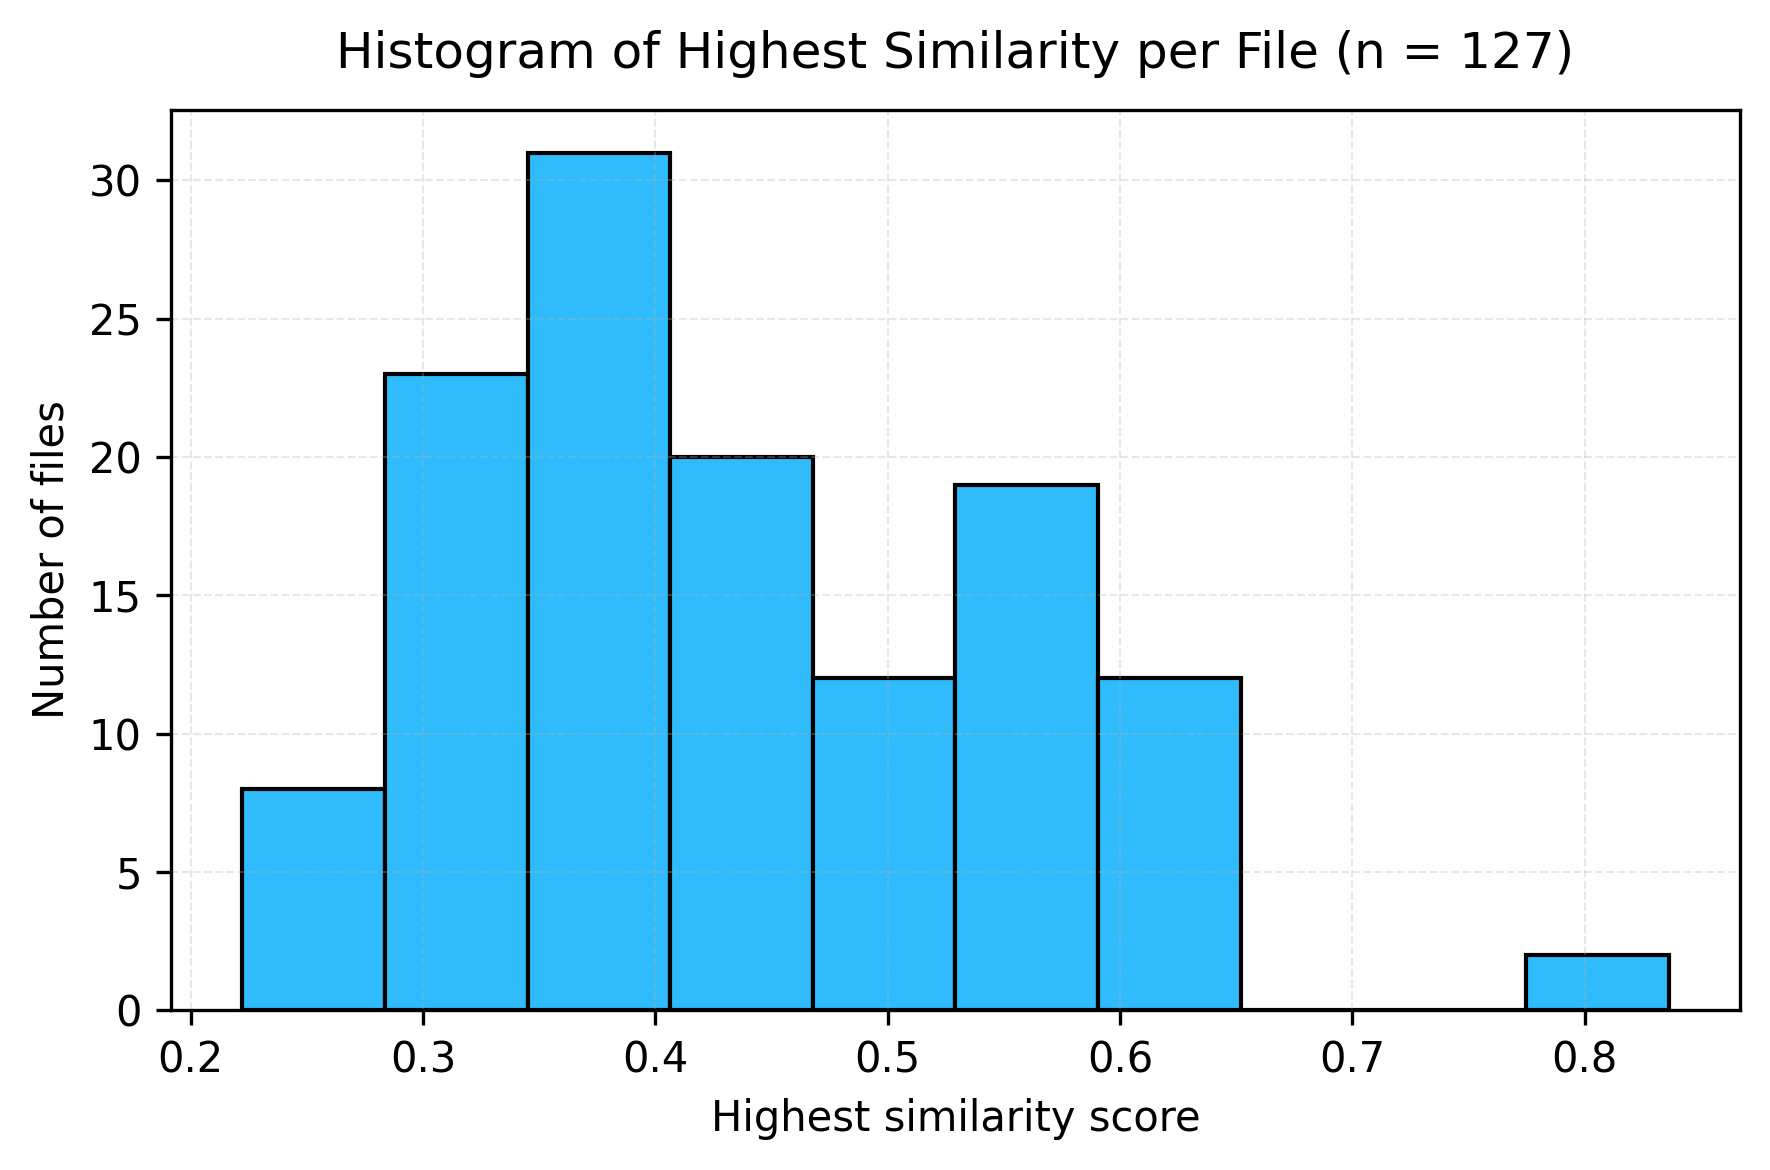

In [ ]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ---------------------------------------------------------------------
# 1. load the reference list of valid env IDs
# ---------------------------------------------------------------------
with open("gg_bench/data/splits/valid_envs.json") as f:
    valid_envs = {int(pair[0]) for pair in json.load(f)}        # set for O(1) lookup

# ---------------------------------------------------------------------
# 2. read the pair-similarity data
# ---------------------------------------------------------------------
PATH = "dolos-report-20250423T045200208Z-env272py--env154py/pairs.csv"
pairs = pd.read_csv(PATH)

# helper to turn ".../env_272.py" → 272
def env_id(path: str) -> int:
    return int(Path(path).stem.split("_")[1])

# validate *both* columns
for col in ("leftFilePath", "rightFilePath"):
    assert all(env_id(p) in valid_envs for p in pairs[col]), f"Bad paths in {col}"

# ---------------------------------------------------------------------
# 3. reshape → one (fileId, similarity) per row
# ---------------------------------------------------------------------
left  = pairs[["leftFileId",  "similarity"]].rename(columns={"leftFileId":  "fileId"})
right = pairs[["rightFileId", "similarity"]].rename(columns={"rightFileId": "fileId"})
stacked = pd.concat([left, right], ignore_index=True)

# ---------------------------------------------------------------------
# 4. keep the *highest* similarity for each file
# ---------------------------------------------------------------------
best_per_file = stacked.groupby("fileId")["similarity"].max().sort_index()
n_files = len(best_per_file)
assert n_files == len(valid_envs), f"Expected {len(valid_envs)} distinct files, got {n_files}"

# ---------------------------------------------------------------------
# 5. summary statistics
# ---------------------------------------------------------------------
print(f"Highest similarity per file (n = {n_files})\n")
print(best_per_file.describe())
print(f"\nVariance : {best_per_file.var():.6f}")
print(f"Skewness : {best_per_file.skew():.6f}")
print(f"Kurtosis : {best_per_file.kurt():.6f}")

# ---------------------------------------------------------------------
# 6. histogram (publication-ready)
#    – Freedman–Diaconis bin width, clipped to 10–60 bins
# ---------------------------------------------------------------------
data = best_per_file.to_numpy()
q25, q75 = np.percentile(data, [25, 75])
iqr = q75 - q25
fd_width = 2 * iqr / (len(data) ** (1 / 3))
bins = int(round((data.max() - data.min()) / fd_width)) if fd_width else 30
bins = max(10, min(bins, 60))  # sensible bounds

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.hist(data, bins=bins, edgecolor="black", color="#30bcfc")
ax.set_title(f"Histogram of Highest Similarity per File (n = {n_files})", pad=10)
ax.set_xlabel("Highest similarity score")
ax.set_ylabel("Number of files")
ax.grid(alpha=0.3, linestyle="--", linewidth=0.5)
fig.tight_layout()

# save a vector PDF for the paper
fig.savefig("docs/figures/highest_similarity_histogram.pdf")
plt.show()